# ITEM1

In [1]:
import numpy as np 
import pandas as pd

df = pd.read_csv("C:/SA2/BTC.csv")
display(df.columns)

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price'],
      dtype='object')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# CLEANING DATA

In [18]:
df["returns"] = df["Open"] - df["Close"]
dfc= df.dropna()
display(dfc.head(2))

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,returns
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.00,4.39,0.0
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.72,4.39,0.0


# MAKING HISTOGRAM

(array([1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.00

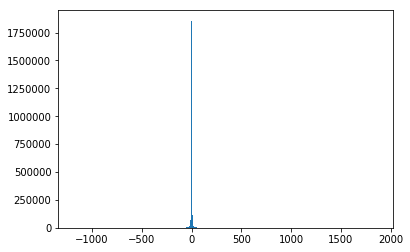

In [32]:
returns = dfc["returns"]
plt.hist(returns, bins=1000)

# ZOOMING IN TO GET A BETTER VIEW

(0, 150000)

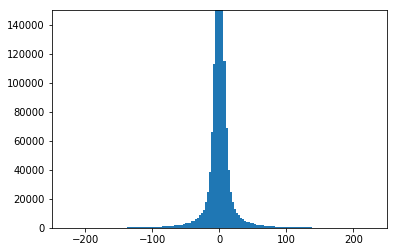

In [33]:
plt.hist(returns, bins=1000)
plt.xlim([-250, 250])
plt.ylim([0, 150000])

As we can see this histogram has a similarity to the laplace distribution

# OVERLAYING GRAPH WITH LAPLACE DISTRIBUTION

C:\Users\bodic\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1615: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


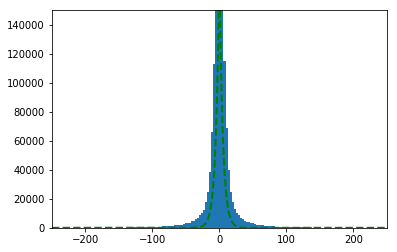

In [34]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

plt.hist(returns, bins=1000)
plt.xlim([-250, 250])
plt.ylim([0, 150000])

x = np.linspace(-250, 250, 1000)

mu, b = stats.laplace.fit(returns)
# Calculate the y values for the Laplace distribution curve
y = stats.laplace.pdf(x, loc=mu, scale=b) * len(returns) * (x[1] - x[0])

# Plot the Laplace distribution curve on top of the histogram
plt.plot(x, y, 'g--', linewidth=2)

Now with the laplace distribution line overlayed, we can clearly sea that it follows the laplace distribution

# ITEM #2

In [40]:
dfe=pd.read_csv("C:/SA2/ETH.csv")
display(dfe.head(2))

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1586995200000,2020-04-16 00:00:00,ETHUSD,152.94,152.94,151.33,151.33,112.724931
1,1586995140000,2020-04-15 23:59:00,ETHUSD,152.94,152.94,152.94,152.94,0.000000


# GETTING DATA EVERY 5 MIN

In [44]:
dfe_5min = dfe[::5]  
display(dfe_5min.head(5))

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1586995200000,2020-04-16 00:00:00,ETHUSD,152.94,152.94,151.33,151.33,112.724931
5,1586994900000,2020-04-15 23:55:00,ETHUSD,153.25,153.25,153.13,153.14,15.993960
10,1586994600000,2020-04-15 23:50:00,ETHUSD,153.05,153.22,153.05,153.22,2.700000
15,1586994300000,2020-04-15 23:45:00,ETHUSD,153.29,153.29,153.25,153.25,0.374382
20,1586994000000,2020-04-15 23:40:00,ETHUSD,153.23,153.23,153.23,153.23,0.000000


# ADDING RETURNS COLUMN

In [45]:
dfe_5min["returns"] = dfe_5min["Open"] - dfe_5min["Close"]
display(dfe_5min.head(5))

C:\Users\bodic\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume,returns
0,1586995200000,2020-04-16 00:00:00,ETHUSD,152.94,152.94,151.33,151.33,112.724931,1.61
5,1586994900000,2020-04-15 23:55:00,ETHUSD,153.25,153.25,153.13,153.14,15.993960,0.11
10,1586994600000,2020-04-15 23:50:00,ETHUSD,153.05,153.22,153.05,153.22,2.700000,-0.17
15,1586994300000,2020-04-15 23:45:00,ETHUSD,153.29,153.29,153.25,153.25,0.374382,0.04
20,1586994000000,2020-04-15 23:40:00,ETHUSD,153.23,153.23,153.23,153.23,0.000000,0.00


# PLOTTING

(0, 15000)

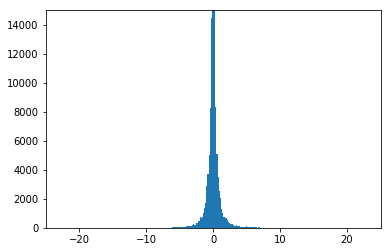

In [52]:
ethreturns = dfe_5min["returns"]
plt.hist(ethreturns, bins=1000)
plt.xlim([-25, 25])
plt.ylim([0, 15000])

# TESTING FOR SHAPIRO-WILK NORMALITY TEST

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro

statistic, pvalue = shapiro(dfe_5min['returns'])

if pvalue < 0.05:
    print("The data is not normally distributed (reject H0)")
else:
    print("The data is normally distributed (fail to reject H0)")
print(f"Statistic: {statistic:.4f}, p-value: {pvalue:.4f}")

The data is not normally distributed (reject H0)
Statistic: 0.3699, p-value: 0.0000


C:\Users\bodic\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
